In [10]:
from GUI_Helper_fcn import *
import matplotlib.pyplot as plt

In [11]:
#block to modify
STmap_file_prefix = "220718M2_jejunum_rec4"
light_time = [60, 240, 420]
light_time_ob = 60
light_distance = 425
fps = 25
scale = 305
start_index = 200 #start of left segment
end_index = 500 #end of right segment

In [12]:
def load_matrix(name):
    """Helper function for loading a matrix stored in specified file

    :param name: Path to the file storing matrix information.
    :return: A matrix (Numpy ndarray) is successfully loaded; else, None
    """
    try:
        with open(name, "rb") as f:
            a = np.load(f)
        return a
    except:
        print(f"File {name} Not Found!")
        return None

In [13]:
im_s = load_matrix(f"raw_diameter_STmap_{STmap_file_prefix}.npy")
im_z = load_matrix(f"zscore_STmap_{STmap_file_prefix}.npy")

In [14]:
aspect = (shape(im_s)[1] / scale) / (shape(im_s)[0] / fps)
setGlobal_GUI(fps, scale, STmap_file_prefix, aspect)

The original STmap with light experiments:


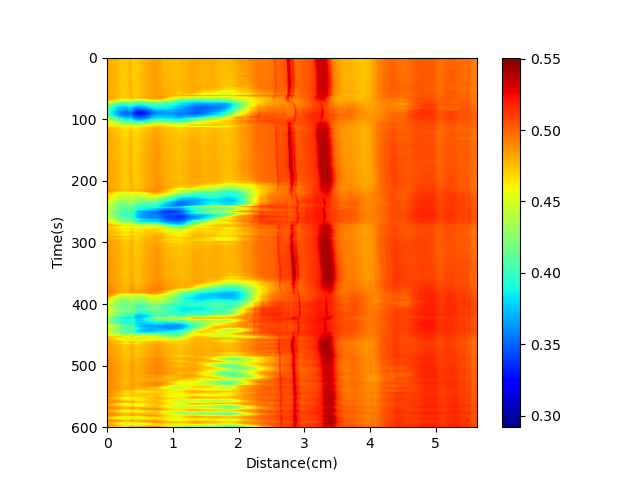

In [15]:
print("The original STmap with light experiments:")
ST_map_visual(im_s,light_time,light_time_ob, light_distance, c_low = None, c_high = None,
               d_min = None, d_max = None, t_min = None, t_max = None, saveFlag = False, figType = None)

In [16]:
im_s_before = im_s[:,start_index:light_distance]
im_s_after = im_s[:,light_distance:end_index]
im_z_before = im_z[:,start_index:light_distance]
im_z_after = im_z[:,light_distance:end_index]
im_s_before_mean = np.mean(im_s_before, axis = 1)
im_s_after_mean = np.mean(im_s_after, axis = 1)
im_z_before_mean = np.mean(im_z_before, axis = 1)
im_z_after_mean = np.mean(im_z_after, axis = 1)

In [17]:
xx = np.array(list(range(im_s.shape[0])))/fps

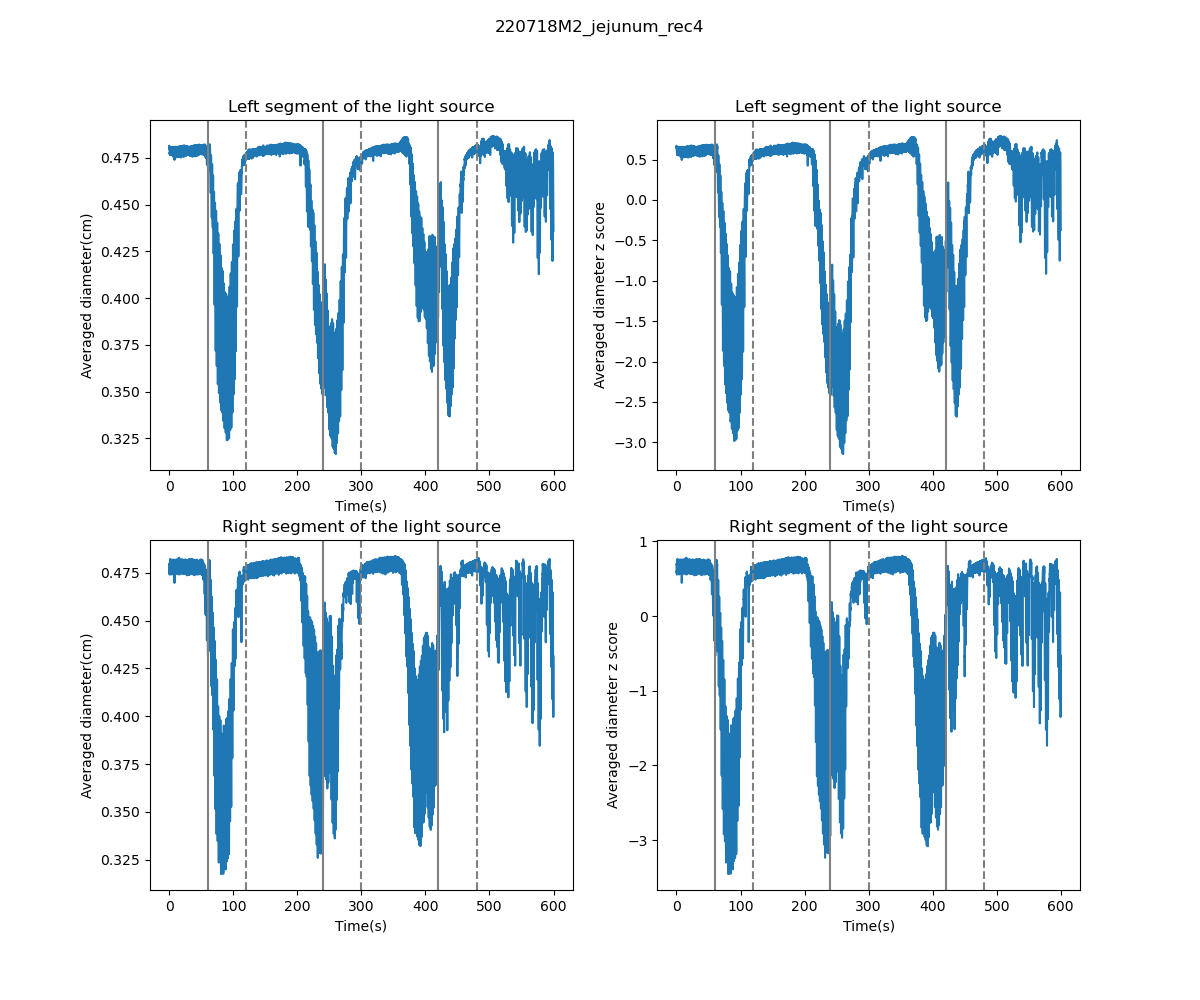

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].plot(xx, im_s_before_mean)
axs[0, 0].set_ylabel("Averaged diameter(cm)")
axs[0, 0].set_title("Left segment of the light source")

axs[0, 1].plot(xx, im_z_before_mean)
axs[0, 1].set_ylabel("Averaged diameter z score")
axs[0, 1].set_title("Left segment of the light source")

axs[1, 0].plot(xx, im_s_after_mean)
axs[1, 0].set_ylabel("Averaged diameter(cm)")
axs[1, 0].set_title("Right segment of the light source")

axs[1, 1].plot(xx, im_z_after_mean)
axs[1, 1].set_ylabel("Averaged diameter z score")
axs[1, 1].set_title("Right segment of the light source")

for m in range(2):
    for n in range(2):
        axs[m, n].set_xlabel("Time(s)")
        for i in light_time:
            axs[m, n].axvline(x = i, color='grey', linestyle='-')
            axs[m, n].axvline(x = (i + light_time_ob), color='grey', linestyle='--')
plt.suptitle(STmap_file_prefix)
plt.show()
plt.savefig(f"time_series_light_{STmap_file_prefix}.png", dpi = 300)